In [1]:
import torch
from torchvision import datasets, transforms
from model import SimpleNet
from trainer import train_and_evaluate
from optimizers import get_optimizer
from utils import add_noise_to_data, learning_rate_search
from visualization import plot_loss_curves, plot_accuracy_bars, plot_time_bars, plot_memory_bars

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.98MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
noisy_train_loader = add_noise_to_data(train_loader, noise_factor=0.5, noise_type='salt_pepper', random_noise=False)
noisy_test_loader = add_noise_to_data(test_loader, noise_factor=0.5, noise_type='salt_pepper', random_noise=False)

In [5]:
optimizers = ['SGD', 'Momentum', 'Adam', 'RMSprop']
lr_list = [0.1, 0.01, 0.001, 0.0001]
clean_best_hyperparams = learning_rate_search(train_loader, test_loader, device=device, epochs=3, optimizers=optimizers, lr_list=lr_list)

Learning Rate Search for SGD...
The Best Learning Rate for SGD is 0.1

Learning Rate Search for Momentum...
The Best Learning Rate for Momentum is 0.01

Learning Rate Search for Adam...
The Best Learning Rate for Adam is 0.001

Learning Rate Search for RMSprop...
The Best Learning Rate for RMSprop is 0.001



In [6]:
optimizers = ['SGD', 'Momentum', 'Adam', 'RMSprop']
lr_list = [0.1, 0.01, 0.001, 0.0001]
noisy_best_hyperparams = learning_rate_search(noisy_train_loader, noisy_train_loader, device=device, epochs=3, optimizers=optimizers, lr_list=lr_list)

Learning Rate Search for SGD...
The Best Learning Rate for SGD is 0.1

Learning Rate Search for Momentum...
The Best Learning Rate for Momentum is 0.01

Learning Rate Search for Adam...
The Best Learning Rate for Adam is 0.001

Learning Rate Search for RMSprop...
The Best Learning Rate for RMSprop is 0.001



In [7]:
clean_results = []
for name, optimizer_config in clean_best_hyperparams.items():
    print(f'{name} Optimizer...')
    model = SimpleNet().to(device)
    best_lr = optimizer_config['best_lr']
    optimizer, scheduler = get_optimizer(model=model, optimizer_type=name, lr=best_lr)

    losses_clean, accuracy_clean, end_time_clean, memory_used_clean = train_and_evaluate(model, optimizer, scheduler, train_loader, test_loader, device, epochs=5)
    clean_results.append((name, losses_clean, accuracy_clean, end_time_clean, memory_used_clean, 'clean'))

    print(f'Accuracy: {accuracy_clean}%\nTraining time: {end_time_clean:.2f}s\nMemory: {memory_used_clean:.2f} MB\n')

SGD Optimizer...
Accuracy: 97.0%
Training time: 109.18s
Memory: 2.23 MB

Momentum Optimizer...
Accuracy: 97.17%
Training time: 107.82s
Memory: 2.29 MB

Adam Optimizer...
Accuracy: 96.98%
Training time: 108.41s
Memory: 2.23 MB

RMSprop Optimizer...
Accuracy: 96.77%
Training time: 106.49s
Memory: 2.23 MB



In [8]:
noisy_results = []
for name, optimizer_config in noisy_best_hyperparams.items():
    print(f'{name} Optimizer...')
    model = SimpleNet().to(device)
    best_lr = optimizer_config['best_lr']
    optimizer, scheduler = get_optimizer(model=model, optimizer_type=name, lr=best_lr)

    losses_noisy, accuracy_noisy, end_time_noisy, memory_used_noisy = train_and_evaluate(model, optimizer, scheduler, noisy_train_loader, noisy_test_loader, device, epochs=5)
    noisy_results.append((name, losses_noisy, accuracy_noisy, end_time_noisy, memory_used_noisy, 'noisy'))

    print(f'Accuracy: {accuracy_noisy}%\nTraining time: {end_time_noisy:.2f}s\nMemory: {memory_used_noisy:.2f} MB\n')

SGD Optimizer...
Accuracy: 74.76%
Training time: 6.93s
Memory: 0.11 MB

Momentum Optimizer...
Accuracy: 73.71%
Training time: 7.81s
Memory: 0.09 MB

Adam Optimizer...
Accuracy: 74.92%
Training time: 8.96s
Memory: 0.11 MB

RMSprop Optimizer...
Accuracy: 73.88%
Training time: 7.97s
Memory: 0.10 MB



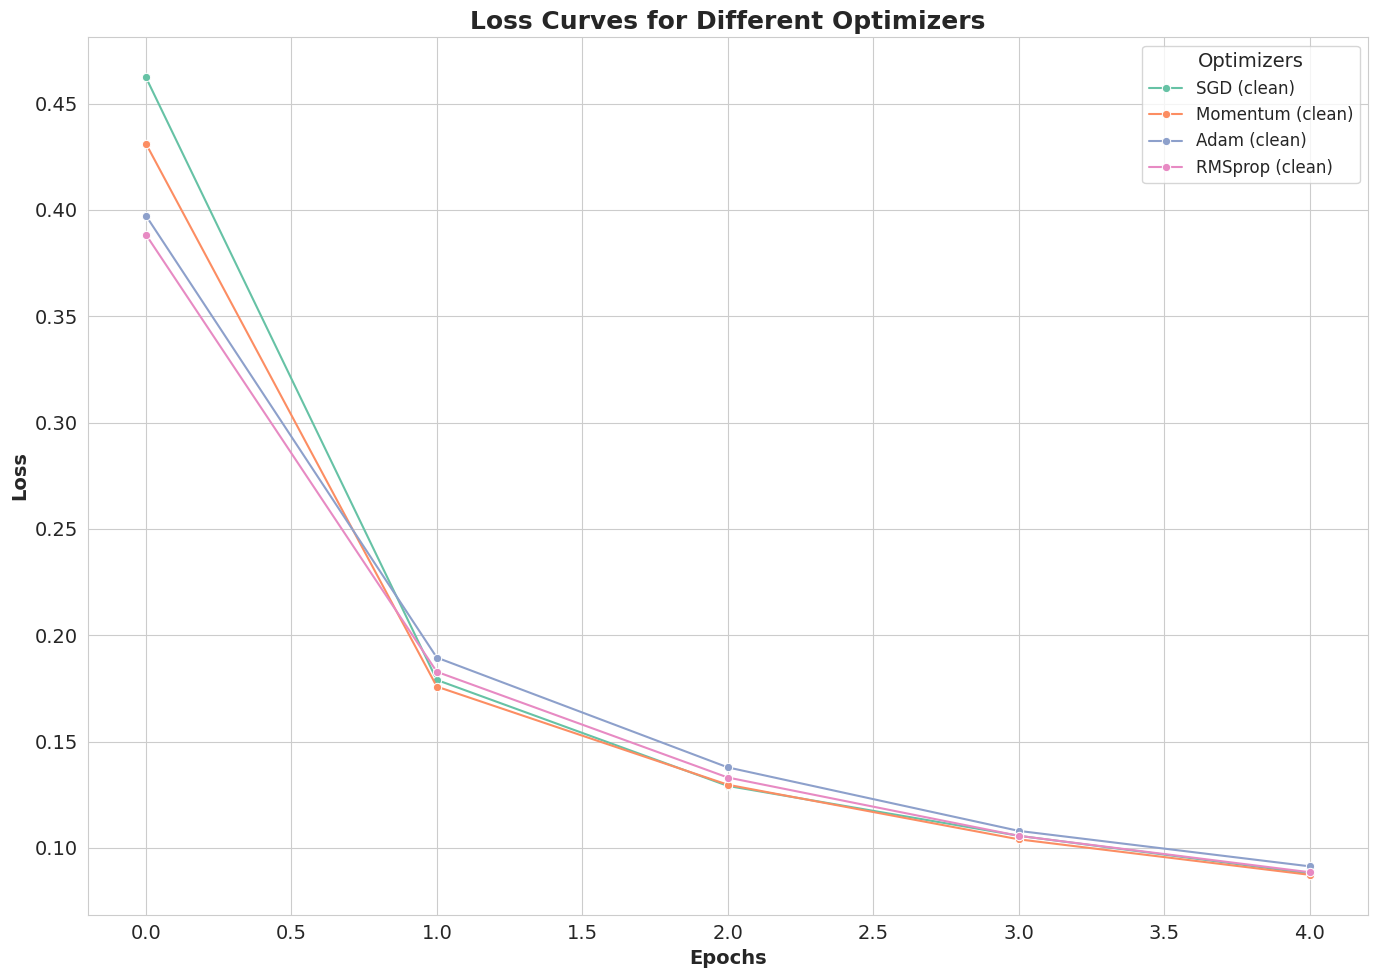

In [9]:
plot_loss_curves(clean_results)

/content/visualization.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=accuracies, palette="Blues_d")


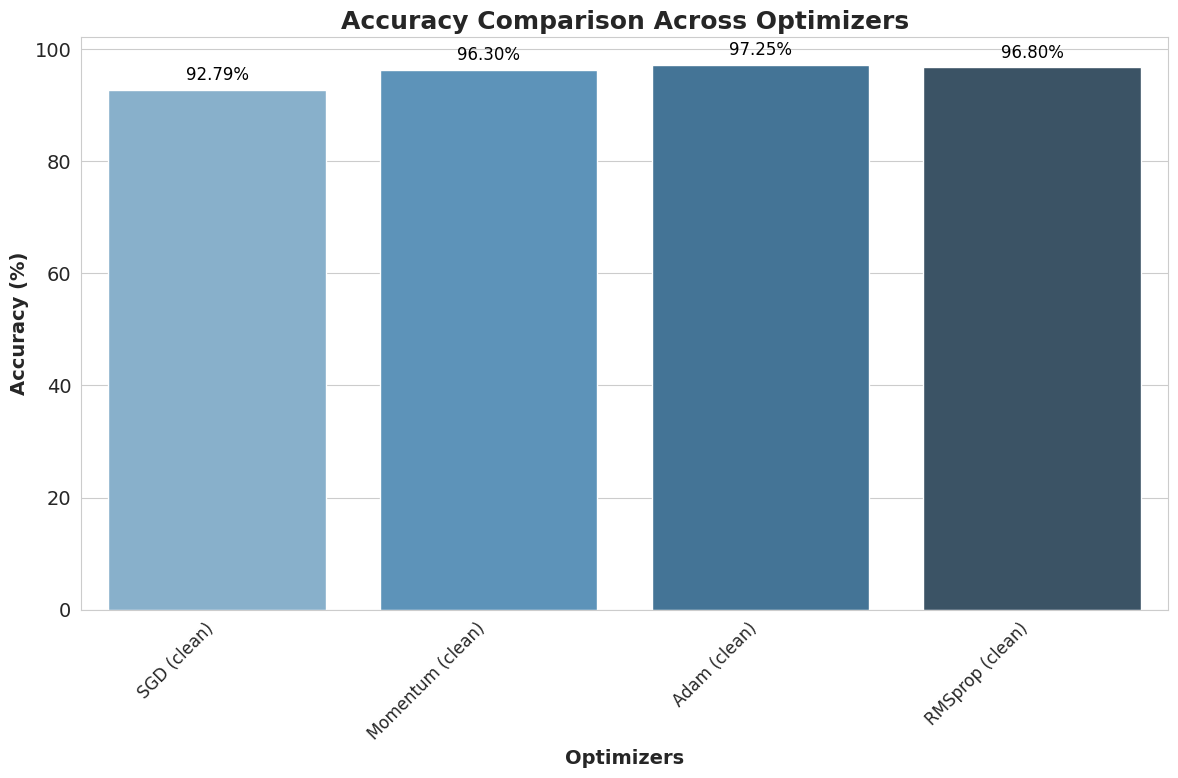

In [10]:
plot_accuracy_bars(clean_results)

/content/visualization.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=times, palette="Greens_d")


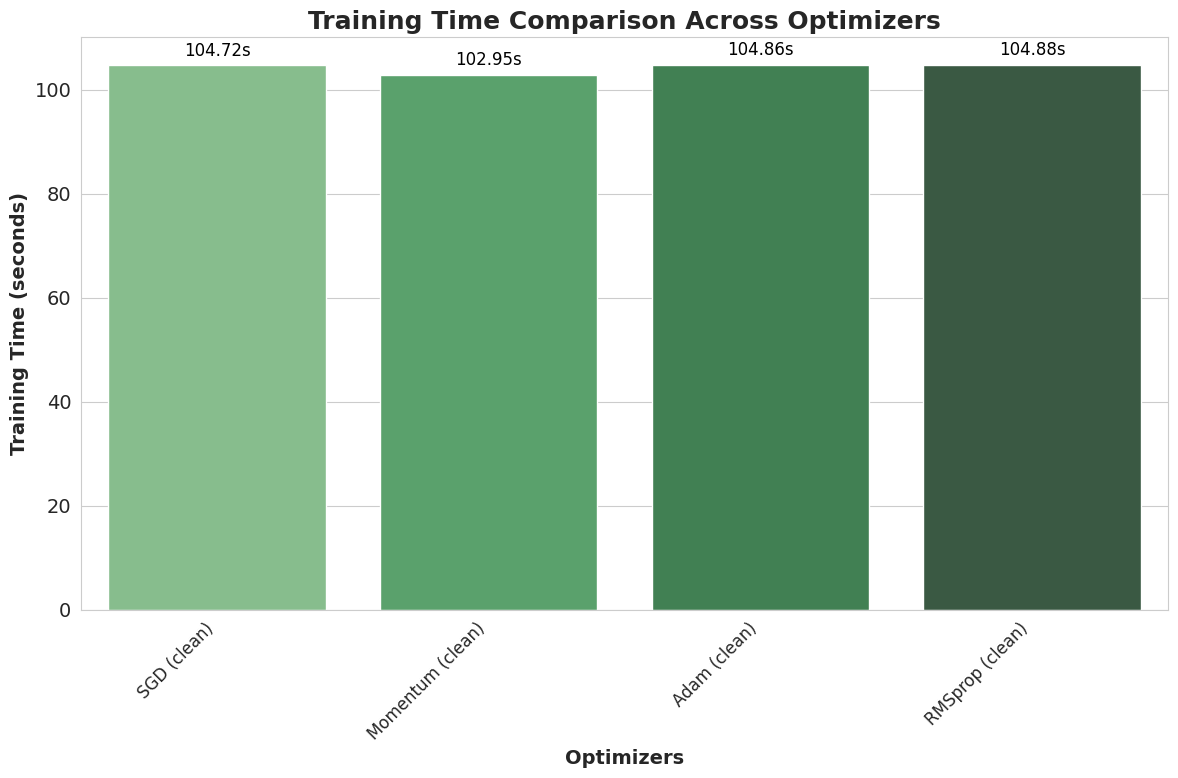

In [11]:
plot_time_bars(clean_results)

/content/visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=memory_usage, palette="Oranges_d")


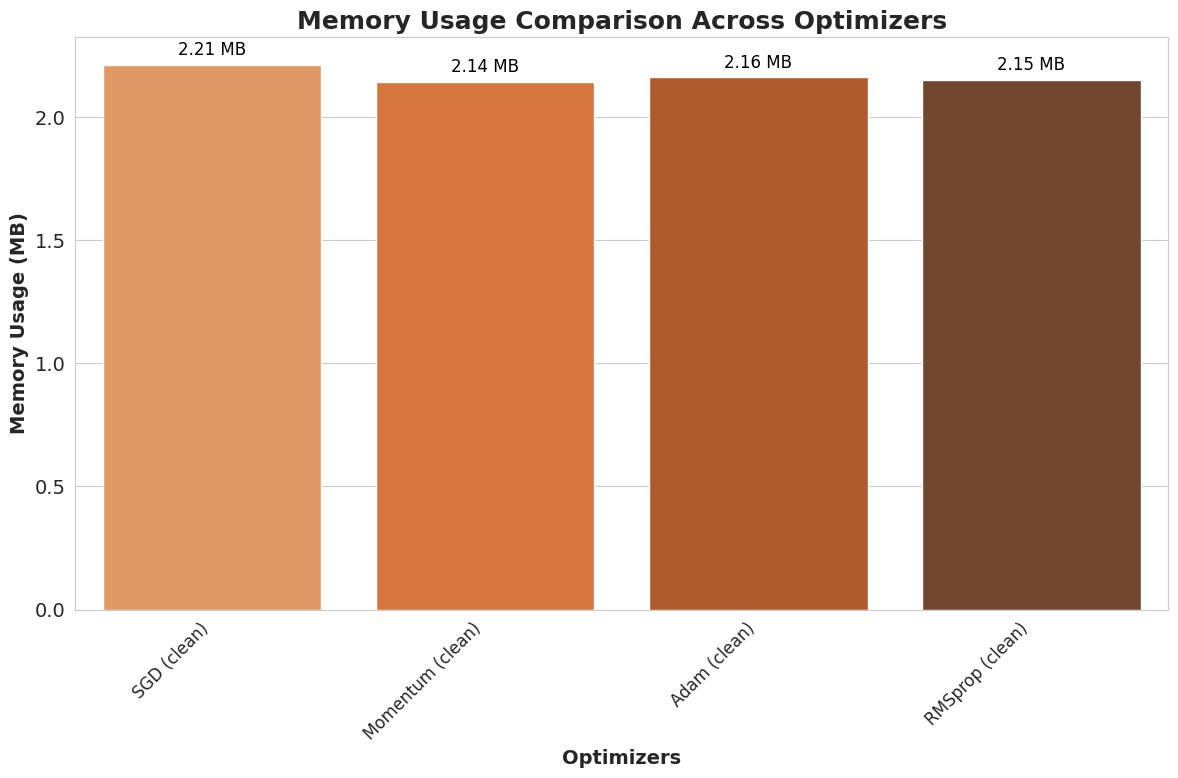

In [12]:
plot_memory_bars(clean_results)

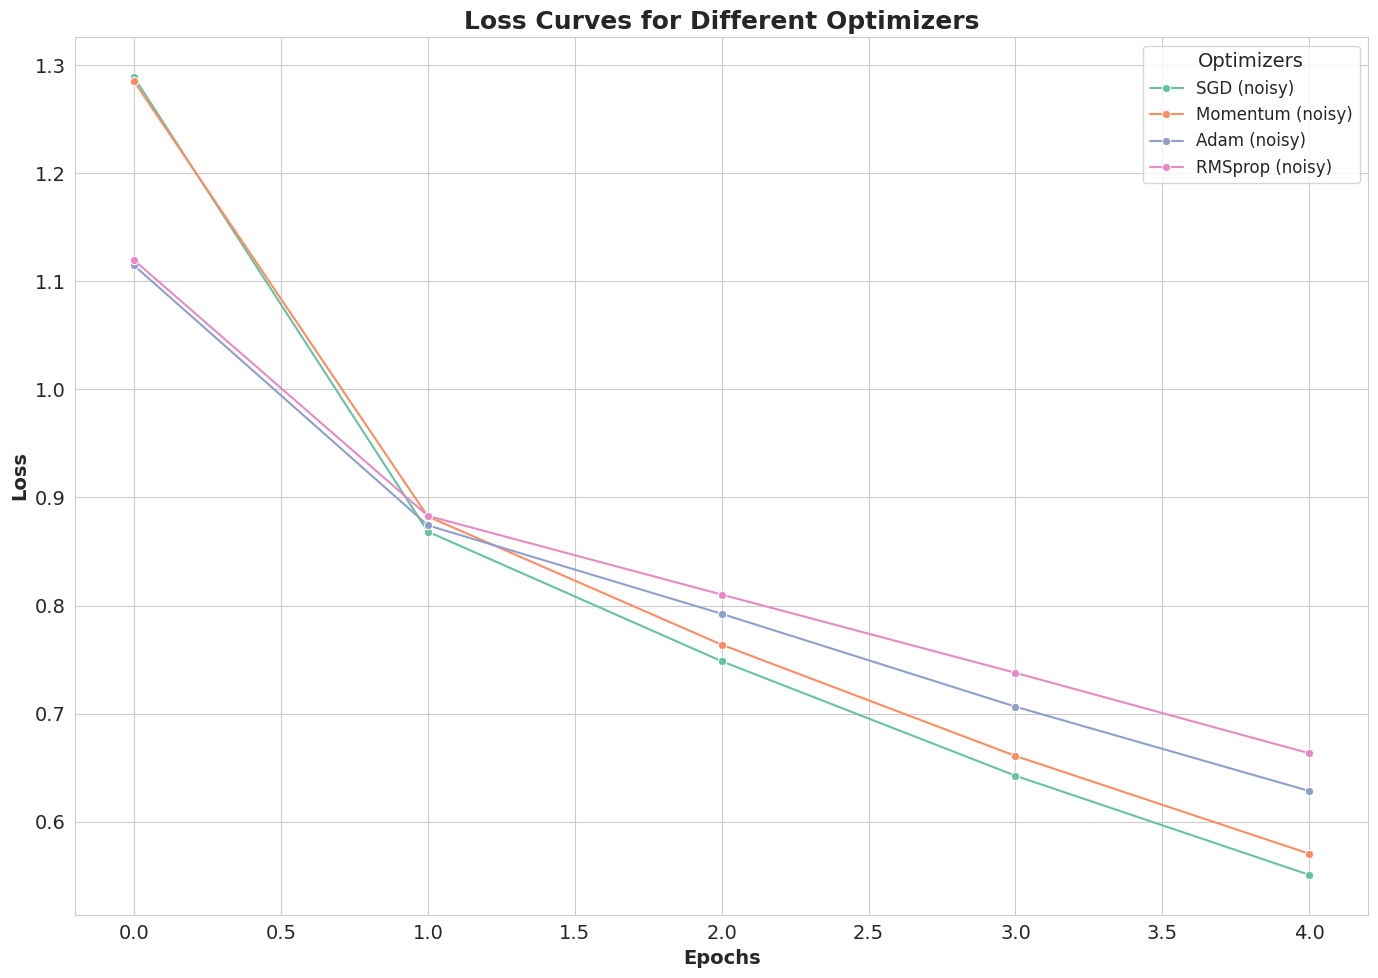

In [13]:
plot_loss_curves(noisy_results)

/content/visualization.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=accuracies, palette="Blues_d")


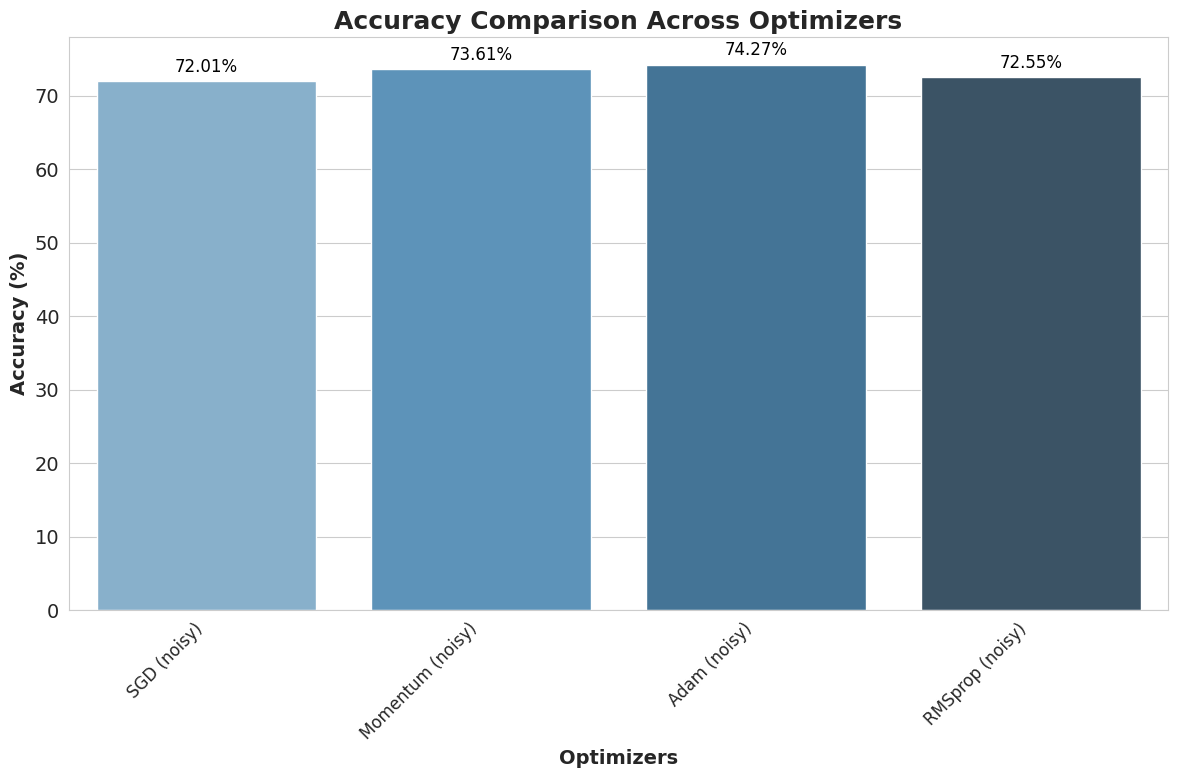

In [14]:
plot_accuracy_bars(noisy_results)

/content/visualization.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=times, palette="Greens_d")


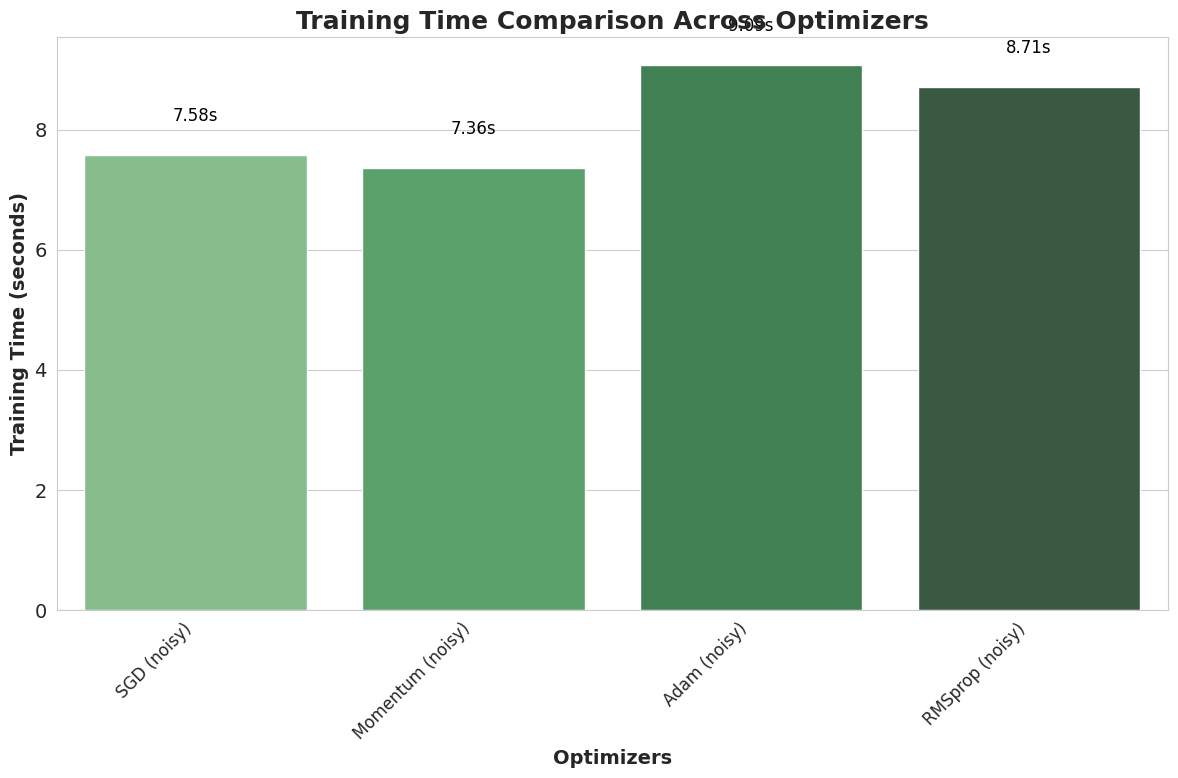

In [15]:
plot_time_bars(noisy_results)

/content/visualization.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=memory_usage, palette="Oranges_d")


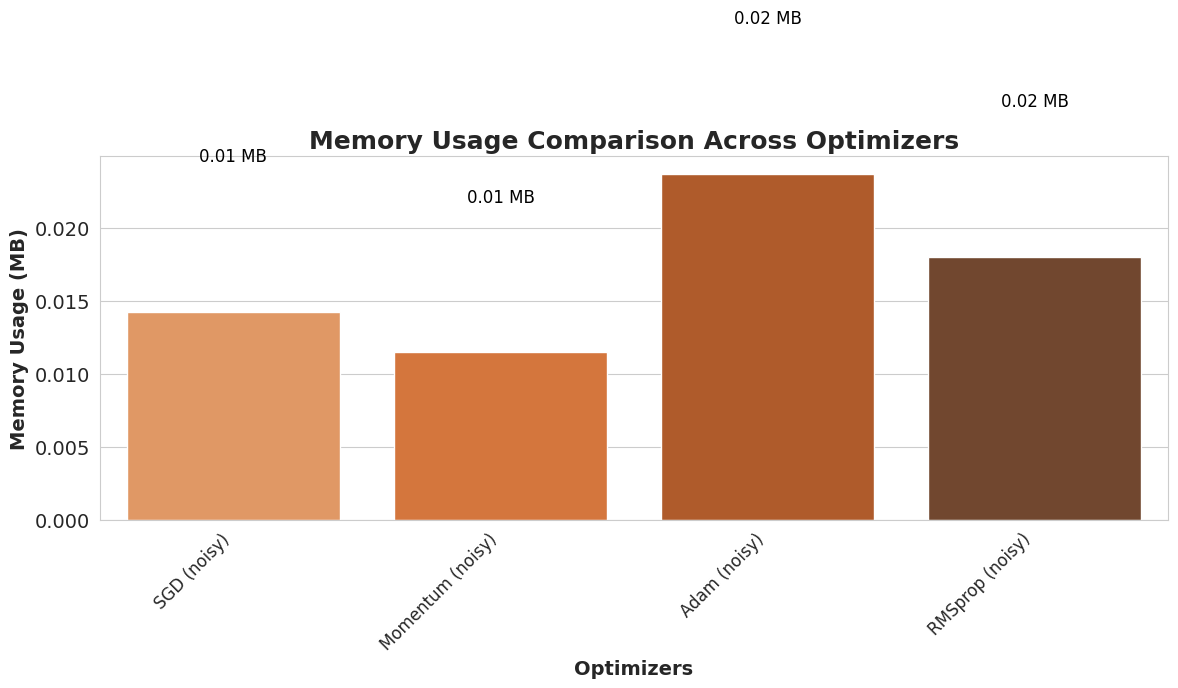

In [16]:
plot_memory_bars(noisy_results)